<a href="https://colab.research.google.com/github/georgywasiat/Livin-by-Mandiri-Sentiment-Analysis-with-LSTM/blob/main/Sentiment_Analysis_of_the_Livin'_by_Mandiri_Application_Reviews_Using_LSTM_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Sentiment Analysis of the Livin' by Mandiri Application Reviews Using LSTM Algorithm

Georgy Banny Rizky Wasiat

Universitas Diponegoro

# Penjelasan Singkat


Dalam penelitian ini, saya melakukan analisis sentimen terhadap review Aplikasi Livin' by Mandiri yang tersedia di Google Play Store. Data dikumpulkan untuk periode 1-10 Januari 2024 dengan menggunakan teknik Instant Data Scraper pada browser Google Chrome. Tujuan dari analisis ini adalah untuk memahami persepsi pengguna terhadap aplikasi Livin' by Mandiri, yang merupakan salah satu aplikasi perbankan digital terkemuka. Untuk mencapai tujuan tersebut, saya menerapkan algoritma Long Short-Term Memory (LSTM), sebuah metode state-of-the-art dalam pemrosesan bahasa alami, khususnya untuk tugas analisis sentimen. LSTM dipilih karena kemampuannya yang unggul dalam menangani dependensi jangka panjang dalam teks, yang sangat penting dalam memahami konteks dan nuansa dalam review pengguna. Hasil dari analisis ini diharapkan dapat memberikan wawasan berharga bagi Bank Mandiri dalam memahami kebutuhan dan tanggapan pengguna, serta untuk menginformasikan strategi pengembangan aplikasi lebih lanjut. Penelitian ini juga bertujuan untuk menunjukkan penerapan praktis dari teknologi pemrosesan bahasa alami dalam dunia perbankan digital.

# Mengimpor Dataset dan Library Yang Dibutuhkan

In [ ]:
from google.colab import drive
import pandas as pd

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install Sastrawi
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Unduh sumber daya NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
mandiri = pd.read_csv('/content/drive/My Drive/Portofolio/review mandiri.csv')
mandiri_df = pd.DataFrame(mandiri)

# Menampilkan Beberapa Data

In [ ]:
mandiri_df.head(50)

,Text,Sentimen
0,Sampe kapan Livin GK bisa d pake eror mulu,Negatif
1,Saldo hilang 100000 gada riwayat transaksi kmn...,Negatif
2,Udah 2 hari tidak bisa di pake suruh atur jam ...,Negatif
3,setelah di upgrade sangat sangat buruk. tidak ...,Negatif
4,Baru di update tanggal 2 desember 2023 knapa s...,Negatif
5,Mohon bantuannya secepatnya dong. Eror harus u...,Negatif
6,Cuma mau ganti kata sandi susahnya minta ampun...,Negatif
7,Livin sekarang GK worth it lagi payahuang saya...,Negatif
8,Bank mandiri teda besa dibuka,Negatif
9,apk jelek ini mau masuk apknya susah,Negatif


# Proses Pengolahan Teks (Text Processing)

Pembersihan Text

In [ ]:
# Tentukan kolom teks dan label sentimen
text_column = 'Text'
sentiment_column = 'Sentimen'

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Menghapus karakter yang tidak diperlukan, tanda baca, atau simbol khusus
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))

    # Normalisasi teks: mengubah huruf kapital menjadi huruf kecil
    text = text.lower()

    # Menghapus kata-kata tidak relevan atau noise (contoh: kata dengan panjang kurang dari 3)
    text = ' '.join(word for word in text.split() if len(word) > 2)

      # Menghapus kata "subject"
    text = text.replace('subject', '')

    return text

# Terapkan fungsi ke kolom teks pada dataset
mandiri[text_column] = mandiri[text_column].apply(clean_text)

# Cetak informasi dataset setelah pembersihan teks
print(mandiri[[text_column, sentiment_column]].head(40))

                                                 Text Sentimen
0               sampe kapan livin bisa pake eror mulu  Negatif
1   saldo hilang 100000 gada riwayat transaksi kmn...  Negatif
2       udah hari tidak bisa pake suruh atur jam mulu  Negatif
3   setelah upgrade sangat sangat buruk tidak bisa...  Negatif
4   baru update tanggal desember 2023 knapa sekara...  Negatif
5   mohon bantuannya secepatnya dong eror harus up...  Negatif
6   cuma mau ganti kata sandi susahnya minta ampun...  Negatif
7   livin sekarang worth lagi payahuang saya sudah...  Negatif
8                       bank mandiri teda besa dibuka  Negatif
9                apk jelek ini mau masuk apknya susah  Negatif
10  livin ada masalah apa ini kok buat transaksi g...  Negatif
11  bener lah aplikasi mau ganti password aja biki...  Negatif
12                mau bikin rekening kok ribet banget  Negatif
13  banyak bugkadang aplikasi tidak bisa bukatolon...  Negatif
14  setiap mau masuk akun pas verifikasi wajah mal...  

Tokenisasi

In [ ]:
# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    # Tokenisasi teks menggunakan NLTK
    tokens = word_tokenize(text)

    return tokens

# Terapkan fungsi ke kolom teks pada DataFrame menggunakan .loc
mandiri.loc[:, 'Tokens'] = mandiri.loc[:, text_column].apply(tokenize_text)

# Cetak informasi dataset setelah tokenisasi
print(mandiri[['Tokens', sentiment_column]].head(30))

                                               Tokens Sentimen
0       [sampe, kapan, livin, bisa, pake, eror, mulu]  Negatif
1   [saldo, hilang, 100000, gada, riwayat, transak...  Negatif
2   [udah, hari, tidak, bisa, pake, suruh, atur, j...  Negatif
3   [setelah, upgrade, sangat, sangat, buruk, tida...  Negatif
4   [baru, update, tanggal, desember, 2023, knapa,...  Negatif
5   [mohon, bantuannya, secepatnya, dong, eror, ha...  Negatif
6   [cuma, mau, ganti, kata, sandi, susahnya, mint...  Negatif
7   [livin, sekarang, worth, lagi, payahuang, saya...  Negatif
8                 [bank, mandiri, teda, besa, dibuka]  Negatif
9        [apk, jelek, ini, mau, masuk, apknya, susah]  Negatif
10  [livin, ada, masalah, apa, ini, kok, buat, tra...  Negatif
11  [bener, lah, aplikasi, mau, ganti, password, a...  Negatif
12         [mau, bikin, rekening, kok, ribet, banget]  Negatif
13  [banyak, bugkadang, aplikasi, tidak, bisa, buk...  Negatif
14  [setiap, mau, masuk, akun, pas, verifikasi, wa...  

Stopword Removal

In [ ]:
# Fungsi untuk melakukan stopword removal
def remove_stopwords(tokens):
    # Mengambil stopword dalam bahasa Inggris
    stop_words = set(stopwords.words('english'))
    # Menghapus stopword dari tokenisasi
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# Membuat DataFrame
mandiri_df = pd.DataFrame(mandiri)

# Kolom teks pada dataset
text_column = 'text_column'

# Terapkan fungsi stopword removal ke kolom Tokens
mandiri['Tokens'] = mandiri['Tokens'].apply(remove_stopwords)

Stemming dan Lemmatization

In [ ]:
# Fungsi untuk melakukan stemming
def stem_text(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Fungsi untuk melakukan lemmatization
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Terapkan fungsi stemming ke kolom Tokens pada dataset
mandiri['Stemmed_Tokens'] = mandiri['Tokens'].apply(stem_text)

# Terapkan fungsi lemmatization ke kolom Tokens pada dataset
mandiri['Lemmatized_Tokens'] = mandiri['Tokens'].apply(lemmatize_text)

# Cetak informasi dataset setelah tokenisasi, stemming, dan lemmatization
print(mandiri[['Tokens', 'Stemmed_Tokens', 'Lemmatized_Tokens', sentiment_column]].head())

                                              Tokens  \
0      [sampe, kapan, livin, bisa, pake, eror, mulu]   
1  [saldo, hilang, 100000, gada, riwayat, transak...   
2  [udah, hari, tidak, bisa, pake, suruh, atur, j...   
3  [setelah, upgrade, sangat, sangat, buruk, tida...   
4  [baru, update, tanggal, desember, 2023, knapa,...   

                                      Stemmed_Tokens  \
0       [samp, kapan, livin, bisa, pake, eror, mulu]   
1  [saldo, hilang, 100000, gada, riwayat, transak...   
2  [udah, hari, tidak, bisa, pake, suruh, atur, j...   
3  [setelah, upgrad, sangat, sangat, buruk, tidak...   
4  [baru, updat, tanggal, desemb, 2023, knapa, se...   

                                   Lemmatized_Tokens Sentimen  
0      [sampe, kapan, livin, bisa, pake, eror, mulu]  Negatif  
1  [saldo, hilang, 100000, gada, riwayat, transak...  Negatif  
2  [udah, hari, tidak, bisa, pake, suruh, atur, j...  Negatif  
3  [setelah, upgrade, sangat, sangat, buruk, tida...  Negatif  
4  [ba

In [ ]:
# Asumsi dimiliki kolom 'Lemmatized_Tokens' yang berisi teks yang sudah diproses
dokumen = mandiri['Lemmatized_Tokens'].apply(lambda tokens: ' '.join(tokens))

# Menggunakan Sastrawi untuk mendapatkan stop words bahasa Indonesia
stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words()

# Buat representasi bag-of-words dengan menggunakan stop words bahasa Indonesia
vectorizer = CountVectorizer(max_features=1000, stop_words=stopwords)
X = vectorizer.fit_transform(dokumen)

Word Embedding

In [ ]:
mandiri['Processed_Text'] = mandiri['Lemmatized_Tokens'].apply(lambda tokens: ' '.join(tokens)) #yang dipilih adalah lemmatized

# Inisialisasi StopWordRemover dari Sastrawi untuk Bahasa Indonesia
stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()

# Hapus stop words dari dokumen
mandiri['Processed_Text'] = mandiri['Processed_Text'].apply(stopword_remover.remove)

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words=[])

# Ekstraksi fitur menggunakan TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(mandiri['Processed_Text'])

# Konversi hasil ekstraksi fitur menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Gabungkan hasil ekstraksi fitur dengan kolom label sentimen
final_data = pd.concat([tfidf_df, mandiri[sentiment_column]], axis=1)

# Cetak informasi dataset setelah ekstraksi fitur
print(final_data.head())

   100  100k  100rb  14000  200  200rb      2023  2024  2300  25000  ...  \
0  0.0   0.0    0.0    0.0  0.0    0.0  0.000000   0.0   0.0    0.0  ...   
1  0.0   0.0    0.0    0.0  0.0    0.0  0.000000   0.0   0.0    0.0  ...   
2  0.0   0.0    0.0    0.0  0.0    0.0  0.000000   0.0   0.0    0.0  ...   
3  0.0   0.0    0.0    0.0  0.0    0.0  0.000000   0.0   0.0    0.0  ...   
4  0.0   0.0    0.0    0.0  0.0    0.0  0.405322   0.0   0.0    0.0  ...   

   waktu  wallet  wifi  wktu  woy  yaa  yah  yang  zonk  Sentimen  
0    0.0     0.0   0.0   0.0  0.0  0.0  0.0   0.0   0.0   Negatif  
1    0.0     0.0   0.0   0.0  0.0  0.0  0.0   0.0   0.0   Negatif  
2    0.0     0.0   0.0   0.0  0.0  0.0  0.0   0.0   0.0   Negatif  
3    0.0     0.0   0.0   0.0  0.0  0.0  0.0   0.0   0.0   Negatif  
4    0.0     0.0   0.0   0.0  0.0  0.0  0.0   0.0   0.0   Negatif  

[5 rows x 1001 columns]


# Word Cloud

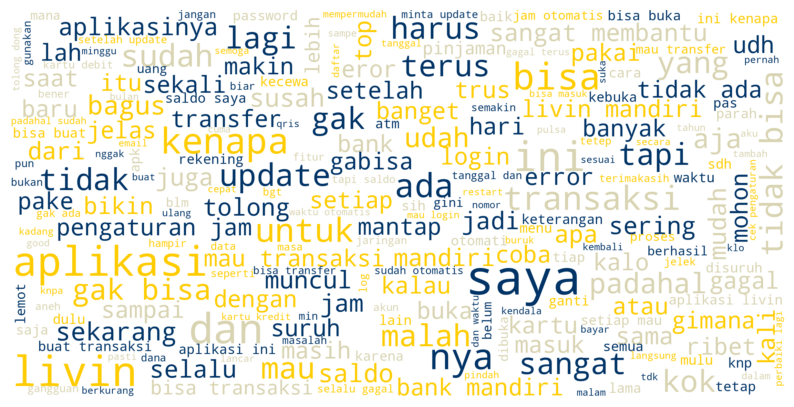

In [ ]:
# Gabungkan semua teks menjadi satu string
all_text = ' '.join(mandiri[text_column])

# Warna untuk WordCloud sesuai permintaan
colors = ['#003366', '#FFCC00', "#D8D3B1"]

# Membuat fungsi untuk mengaplikasikan palet warna ke WordCloud
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return colors[random_state.randint(0, len(colors) - 1)]

# Buat objek WordCloud dengan pengaturan yang disesuaikan
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=50, min_font_size=10,
                      max_words=300, background_color='white', scale=3,
                      contour_width=1, contour_color='steelblue').generate(all_text)

# Tampilkan WordCloud menggunakan matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud.recolor(color_func=color_func, random_state=21), interpolation="bilinear")
plt.axis('off')
plt.show()

# Distribusi Sentimen

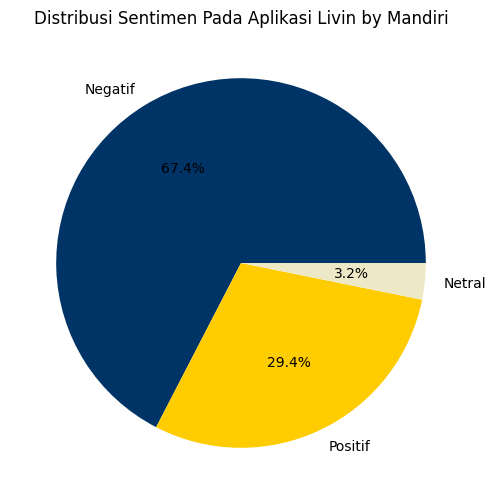

In [ ]:
sentiment_distribution = mandiri['Sentimen'].value_counts()

# Buat grafik distribusi sentimen dalam bentuk diagram pie
plt.figure(figsize=(6, 6))
sentiment_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#003366','#FFCC00' , "#EDE8C6"])
plt.title('Distribusi Sentimen Pada Aplikasi Livin by Mandiri')
plt.ylabel('')  # Menghapus label sumbu Y

plt.show()

# Modeling dan Evaluasi

In [ ]:
# Dengan asumsi 'final_data' adalah DataFrame Anda dan 'label' adalah nama kolom label
X = final_data.drop('Sentimen', axis=1)
y = final_data['Sentimen']

# Ubah label string menjadi nilai numerik
y = y.map({'Negatif': 1, 'Positif': 0, 'Netral' : 2})  # Ganti 'hoax' dan 'real' dengan nilai label Anda yang sebenarnya

# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fiturnya
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Terapkan PCA dengan n_components=2
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Bentuk ulang data untuk input LSTM (dengan asumsi X memiliki bentuk 2D)
X_train_pca = np.reshape(X_train_pca, (X_train_pca.shape[0], X_train_pca.shape[1], 1))
X_test_pca = np.reshape(X_test_pca, (X_test_pca.shape[0], X_test_pca.shape[1], 1))

# Bangun model LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_pca.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))  # Dengan asumsi klasifikasi biner (sigmoid untuk biner, softmax untuk multikelas)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train_pca, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Evaluasi model pada set pengujian
loss, accuracy = model.evaluate(X_test_pca, y_test)
print(f'Akurasi Model: {accuracy * 100:.2f}%')


Epoch 1/200
21/21 [==============================] - 3s 34ms/step - loss: 0.6724 - accuracy: 0.6621 - val_loss: 0.6453 - val_accuracy: 0.6506
Epoch 2/200
21/21 [==============================] - 0s 6ms/step - loss: 0.6222 - accuracy: 0.6757 - val_loss: 0.5863 - val_accuracy: 0.6506
Epoch 3/200
21/21 [==============================] - 0s 6ms/step - loss: 0.5542 - accuracy: 0.6757 - val_loss: 0.5227 - val_accuracy: 0.6506
Epoch 4/200
21/21 [==============================] - 0s 6ms/step - loss: 0.5122 - accuracy: 0.6742 - val_loss: 0.4871 - val_accuracy: 0.6506
Epoch 5/200
21/21 [==============================] - 0s 7ms/step - loss: 0.4985 - accuracy: 0.6727 - val_loss: 0.4687 - val_accuracy: 0.6506
Epoch 6/200
21/21 [==============================] - 0s 7ms/step - loss: 0.4939 - accuracy: 0.6697 - val_loss: 0.4560 - val_accuracy: 0.6566
Epoch 7/200
21/21 [==============================] - 0s 7ms/step - loss: 0.4897 - accuracy: 0.6682 - val_loss: 0.4533 - val_accuracy: 0.6566
Epoch 8/200
